# Central Limit Theorem

Let's use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset.

Take a population and measure a value (size, weight, etc.) for each individual.

The important thing to know is that **whatever** the form of the distribution over the population, the **sampling** distribution tends to a Gaussian, and its dispersion is given by the Central Limit Theorem.

Let's verify this experimentally!

---

## Let's start

Run the following cell to import modules for the livecode

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

❓ Load the `"total_bill"` dataset from seaborn into a `df` variable and display the head

<details>
    <summary>💡 View hint</summary>
    You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset</code></a>
</details>

In [30]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


❓ How many rows are available in the dataset?

In [31]:
df.describe()[['total_bill']]

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


❓ Plot the distribution of the `total_bill` column in the restaurant

In [32]:
df.shape

(244, 7)

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution?

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

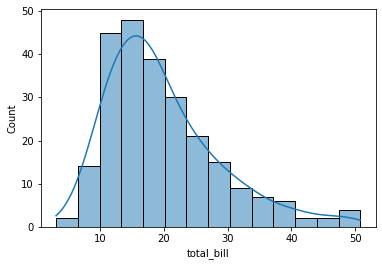

In [33]:
sns.histplot(df['total_bill'],kde = True)

❓ Create variables `mu` and `sigma` storing the mean and standard deviation of the distribution of tips

In [34]:
df['total_bill'].median()

17.795

/Users/selmalopez/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

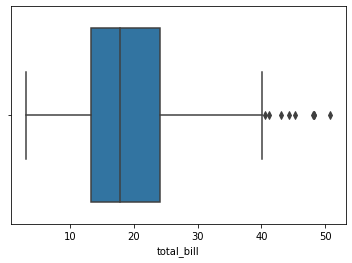

In [35]:
sns.boxplot(df['total_bill'])

In [36]:
df['total_bill'].skew()

1.1332130376158205

In [37]:
stats.skew(df['total_bill'])

1.1262346334818638

In [38]:
mu = df['total_bill'].mean()
print(mu)
sigma = df['total_bill'].std()


19.78594262295082


## Sampling

❓ Pick randomly and with replacement, 10 rows of the dataset, and compute the mean $\bar{x}$ of that sample.

Run this cell a few times, do you get the same result each time? Is this expected?

<AxesSubplot:ylabel='Count'>

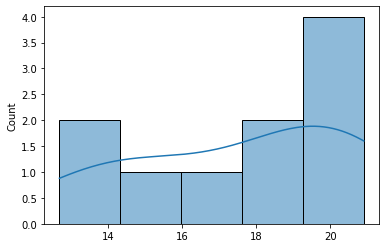

In [39]:
n = 5
N = 10
means = [df['total_bill'].sample(n, replace= False).mean()for i in range(N)]

sns.histplot(means,kde = True)

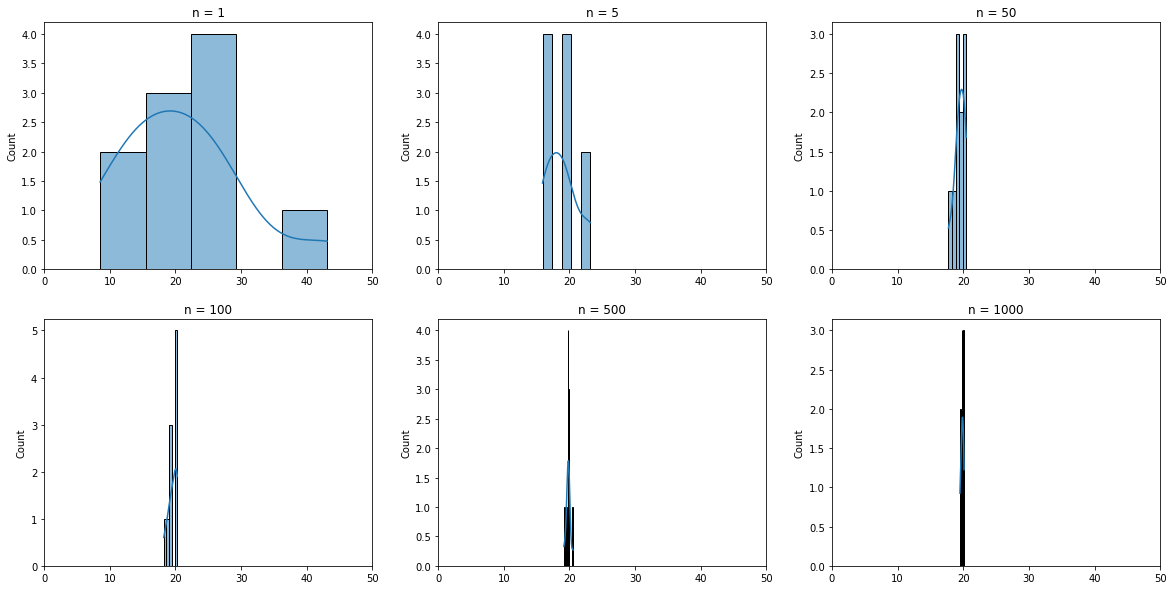

In [43]:
N = 10
n_s = [1,5,50,100,500,1000]
fig, axs = plt.subplots(nrows =2, ncols=3,figsize=(20, 10))
for n, ax in zip(n_s, axs.flat):
    means = [df['total_bill'].sample(n, replace= True).mean()for i in range(N)]
    sns.histplot(means, kde=True, ax=ax)
    ax.set_title(f'n = {n}')
    ax.set_xlim(0,50)

❓ Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

In the same cell, **plot** the distribution of `means`. With $n$ constant, increase $N$ and observe. Then increase $n$ and test another range of $N$. What do you observe?

Try and plot a grid of 6 distributions for $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$

## Checking the CLT

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

❓ Let's verify the Central Limit Theorem computationally:

For each value of `n`:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means, (don't forget the $\sqrt n$ adjustment)
- Compute the `skewness` of the sampling distribution

## Probability

Imagine I take 100 rows from the dataset. What is the probability that the cumulated total bill is **lower than 1800€**? 

❓ Plot `pdf` from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) using `mu`, `sigma` and `n` for the distribution of samples of total bills.

In [45]:
n = 100
stats_norm = stats.norm(mu,sigma / np.sqrt(n))
stats_norm.cdf(18)

0.022421007000834294

❓ What is the probability we are looking for? Use the `cdf` method to find it.

In [49]:
x = np.linspace(0,40,100)
y = stats_norm.cdf(x)

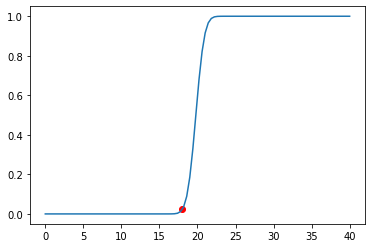

In [50]:
plt.plot(x,y)
plt.scatter(18,stats_norm.cdf(18), c= 'r');

❓ Compute the z-score for the value `18€`

In [51]:
stats_norm.cdf(18)

0.022421007000834294

In [53]:
z = (18-mu)/(sigma/np.sqrt(100))
z

-2.006133429914429

In [54]:
z_norm = stats.norm(0,1)
z_norm.cdf(z)

0.022421007000834294

❓ Plot the normal distribution (0, 1) and a red dot for the target (use the `pdf`)